In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize #for fitting
import scipy.io #for loading Matlab data

%matplotlib inline

In [3]:
path='C:/Users/eugen/Dropbox/0_Stanford_data/Evgeny/VTI/';
file='181116_STOE35BN/run8c.mat';

mat = scipy.io.loadmat(path+file)
B=np.squeeze(mat['data'][0][0]['Field'].T)
AR1=1;Rxx1=np.squeeze(mat['data'][0][0]['R1'].T)/AR1;
Rxx2=np.squeeze(mat['data'][0][0]['R2'].T);
Rxy1=np.squeeze(mat['data'][0][0]['R3'].T);
Rxy2=np.squeeze(mat['data'][0][0]['R4'].T);


 
Rxy(0) =  -9.672e-07 +/- 1.793e-01 (Ohms)
R_Hall =  -3.586e+01 +/- 4.724e-02 (Ohms/T)
N =  -1.741e+13 (cm^-2)
mu =  247.00  (cm^2/Vs)
 
Rxy(0) =  -1.887e-06 +/- 2.740e-01 (Ohms)
R_Hall =  -3.640e+01 +/- 4.657e-02 (Ohms/T)
N =  -1.715e+13 (cm^-2)
mu =  250.68  (cm^2/Vs)


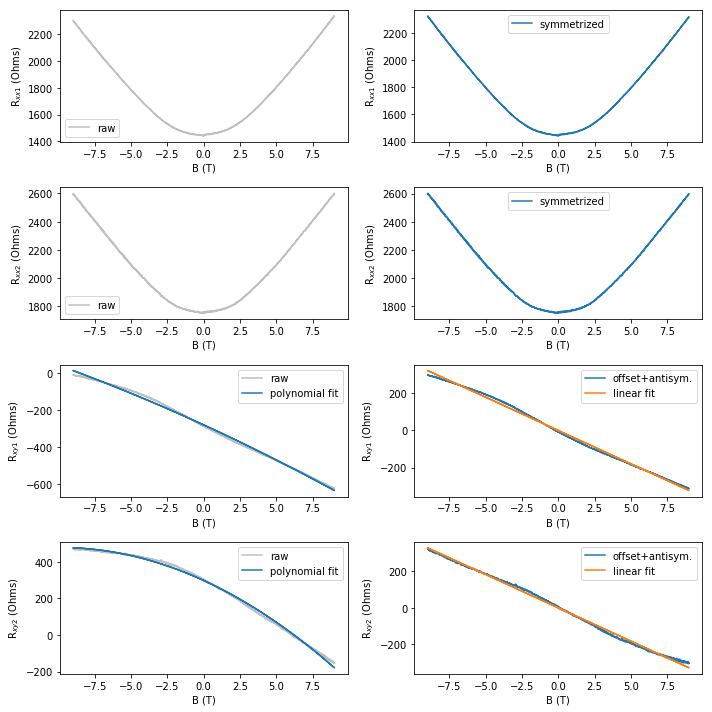

In [4]:
def poly2fit(x,a,b,c):
    return a+b*x+c*x**2
def linfit(x,a,b):  
    return a+b*x

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(4,2,1);ax2 = plt.subplot(4,2,2);
ax3 = plt.subplot(4,2,3);ax4 = plt.subplot(4,2,4);
ax5 = plt.subplot(4,2,5);ax6 = plt.subplot(4,2,6);
ax7 = plt.subplot(4,2,7);ax8 = plt.subplot(4,2,8);


axA=ax1;axB=ax2;Rxx=Rxx1;ylabel='R$_{xx1}$ (Ohms)'
axA.plot(B,Rxx,color = '0.75');axA.set(xlabel='B (T)', ylabel=ylabel);axA.legend(['raw']) 
p0=[Rxx.min(),0];fit,fitcov=scipy.optimize.curve_fit(linfit, B, Rxx,p0=p0,method='lm')
axB.plot(B,Rxx+fit[0]-linfit(B,*fit));axB.set(xlabel='B (T)', ylabel=ylabel);axB.legend(['symmetrized'])

axA=ax3;axB=ax4;Rxx=Rxx2;ylabel='R$_{xx2}$ (Ohms)'
axA.plot(B,Rxx,color = '0.75');axA.set(xlabel='B (T)', ylabel=ylabel);axA.legend(['raw']) 
p0=[Rxx.min(),0];fit,fitcov=scipy.optimize.curve_fit(linfit, B, Rxx,p0=p0,method='lm')
axB.plot(B,Rxx+fit[0]-linfit(B,*fit));axB.set(xlabel='B (T)', ylabel=ylabel);axB.legend(['symmetrized'])

axA=ax5;axB=ax6;Rxy=Rxy1;ylabel='R$_{xy1}$ (Ohms)';Rxx0=Rxx1[0];
axA.plot(B,Rxy,color = '0.75');axA.set(xlabel='B (T)', ylabel=ylabel) 
p0=[Rxy.mean(),0,0];fit,fitcov=scipy.optimize.curve_fit(poly2fit, B, Rxy,p0=p0,method='lm')
RxyC=Rxy-poly2fit(B,*fit)+fit[1]*B
axA.plot(B,poly2fit(B,*fit),'-');axA.legend(['raw','polynomial fit'])
axB.plot(B,RxyC);axB.set(xlabel='B (T)', ylabel=ylabel) 
p0=[Rxy.mean(),0];fit,fitcov=scipy.optimize.curve_fit(linfit, B, RxyC,p0=p0,method='lm')
axB.plot(B,linfit(B,*fit),'-');axB.legend(['offset+antisym.','linear fit']);
fiterr = np.sqrt(np.diag(fitcov)) #one standard deviation error
print(' ');print('Rxy(0) = ',"%.3e"%fit[0],'+/-',"%.3e"%fiterr[0], '(Ohms)')
print('R_Hall = ',"%.3e"%fit[1],'+/-',"%.3e"%fiterr[1],'(Ohms/T)')
print('N = ',"%.3e"%(1e-4/fit[1]/1.602e-19), '(cm^-2)')
print('mu = ',"%.2f"%(1/np.abs((1e-4/fit[1]/1.602e-19))/Rxx0/1.602e-19),' (cm^2/Vs)')

axA=ax7;axB=ax8;Rxy=Rxy2;ylabel='R$_{xy2}$ (Ohms)';Rxx0=Rxx1[0];
axA.plot(B,Rxy,color = '0.75');axA.set(xlabel='B (T)', ylabel=ylabel) 
p0=[Rxy.mean(),0,0];fit,fitcov=scipy.optimize.curve_fit(poly2fit, B, Rxy,p0=p0,method='lm')
RxyC=Rxy-poly2fit(B,*fit)+fit[1]*B
axA.plot(B,poly2fit(B,*fit),'-');axA.legend(['raw','polynomial fit'])
axB.plot(B,RxyC);axB.set(xlabel='B (T)', ylabel=ylabel) 
p0=[Rxy.mean(),0];fit,fitcov=scipy.optimize.curve_fit(linfit, B, RxyC,p0=p0,method='lm')
axB.plot(B,linfit(B,*fit),'-');axB.legend(['offset+antisym.','linear fit']);
fiterr = np.sqrt(np.diag(fitcov)) #one standard deviation error
print(' ');print('Rxy(0) = ',"%.3e"%fit[0],'+/-',"%.3e"%fiterr[0], '(Ohms)')
print('R_Hall = ',"%.3e"%fit[1],'+/-',"%.3e"%fiterr[1],'(Ohms/T)')
print('N = ',"%.3e"%(1e-4/fit[1]/1.602e-19), '(cm^-2)')
print('mu = ',"%.2f"%(1/np.abs((1e-4/fit[1]/1.602e-19))/Rxx0/1.602e-19),' (cm^2/Vs)')

plt.tight_layout()
